<a href="https://colab.research.google.com/github/yandihlg/rrnn/blob/main/p32024_0.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
3import tensorflow as tf
from keras import layers, models
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [39]:
# @title Texto de título predeterminado
#data = pd.read_csv("/content/2023_2024.csv", header=None, names=['fecha', 'evento', 'centenas', 'decenas', 'unidades'])
data = pd.read_csv("/content/2023_2024.csv", header=None, names=['fecha', 'evento', 'decenas', 'unidades'])

In [40]:
data['fecha'] = pd.to_datetime(data['fecha']).map(pd.Timestamp.toordinal)

In [41]:
le = LabelEncoder()
data['evento'] = le.fit_transform(data['evento'])

In [42]:
scaler = MinMaxScaler()
X = scaler.fit_transform(data[['fecha', 'evento']])

In [43]:
y = data['decenas']*10 + data['unidades']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [63]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Una sola unidad de salida porque estamos haciendo predicción numérica
])

In [64]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [65]:
historial =model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
269/269 [==============================] - 1s 2ms/step - loss: 2707.5647
Epoch 2/100
269/269 [==============================] - 0s 2ms/step - loss: 994.3786
Epoch 3/100
269/269 [==============================] - 0s 2ms/step - loss: 939.2905
Epoch 4/100
269/269 [==============================] - 0s 2ms/step - loss: 927.5061
Epoch 5/100
269/269 [==============================] - 1s 2ms/step - loss: 917.8048
Epoch 6/100
269/269 [==============================] - 0s 2ms/step - loss: 908.4089
Epoch 7/100
269/269 [==============================] - 1s 2ms/step - loss: 900.1592
Epoch 8/100
269/269 [==============================] - 1s 3ms/step - loss: 895.3912
Epoch 9/100
269/269 [==============================] - 1s 3ms/step - loss: 889.4985
Epoch 10/100
269/269 [==============================] - 1s 3ms/step - loss: 880.8646
Epoch 11/100
269/269 [==============================] - 1s 2ms/step - loss: 882.8266
Epoch 12/100
269/269 [==============================] - 0s 2ms/step - los

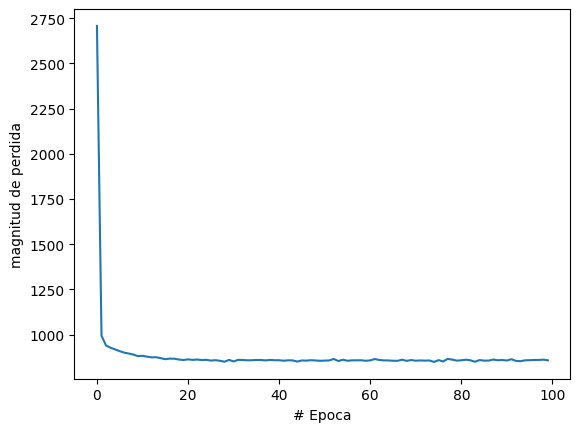

In [66]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("magnitud de perdida")
plt.plot(historial.history["loss"])

In [67]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 68ms/step


In [68]:
for i, prediction in enumerate(predictions):
    print(f"Predicción {i+1}: {prediction[0]}")

Predicción 1: 49.83484649658203
Predicción 2: 49.87346649169922
Predicción 3: 50.597633361816406
Predicción 4: 51.76112747192383
Predicción 5: 51.31697082519531
Predicción 6: 49.84449768066406
Predicción 7: 51.186622619628906
Predicción 8: 51.0562744140625
Predicción 9: 51.770782470703125
Predicción 10: 50.57832336425781
Predicción 11: 51.17696762084961
Predicción 12: 50.438316345214844
Predicción 13: 50.46245193481445
Predicción 14: 50.7135009765625
Predicción 15: 51.45697784423828
Predicción 16: 51.4521484375
Predicción 17: 50.732810974121094
Predicción 18: 51.15283203125
Predicción 19: 51.350765228271484
Predicción 20: 50.761775970458984
Predicción 21: 50.7135009765625
Predicción 22: 51.16248321533203
Predicción 23: 50.008644104003906
Predicción 24: 51.48594284057617
Predicción 25: 51.495601654052734
Predicción 26: 49.849327087402344
Predicción 27: 49.83967208862305
Predicción 28: 51.04179000854492
Predicción 29: 50.30313491821289
Predicción 30: 50.15830612182617
